#확률


In [ ]:
#동전 던지기
#상수형에 관련된 모듈 없음으로 emum을 이용하여 class로 사용
import enum,random
class Coin(enum.Enum):
  FRONT=0
  BACK=1
  def random_coin():
    return random.choice([Coin.FRONT, Coin.BACK])

In [ ]:
#동전 던지기 출력해보기
for _ in range(20):
  if Coin.random_coin() == Coin.FRONT:
    print("앞면", end = ' ')
  else:
    print("뒷면",end = ' ')

앞면 앞면 뒷면 뒷면 앞면 뒷면 뒷면 뒷면 앞면 앞면 앞면 뒷면 앞면 앞면 뒷면 뒷면 앞면 앞면 뒷면 앞면 

만약에 동전을 두 번 던졌을 때
P(both|first)와 P(both|either)를 구하시오.

P(both|first) 첫 번째 던졌을 때 뒷면이 나오고 둘 다 뒷면이 나올 확률

P(both|either) 둘 중 하나가 뒷면이 나오고 둘다 뒷면이 나올 확률

In [ ]:
both_back = 0 #둘 다 뒷면이 나온 횟수
first_back = 0 #첫 번째 뒷면이 나온 횟수
either_back = 0 #둘 중하나는 뒷면이 나온 횟수

for _ in range(10000): #실험횟수가 크면 클 수록 실제 확률 값에 근접해짐.
  first = Coin.random_coin()
  second = Coin.random_coin()
  if first == Coin.BACK:
    first_back +=1
  if first ==Coin.BACK and second == Coin.BACK:
    both_back +=1
  if first == Coin.BACK or second == Coin.BACK:
    either_back +=1
print("P(both|first)", both_back/first_back)
print("P(both|either)", both_back/either_back)

P(both|first) 0.5006016847172082
P(both|either) 0.33386837881219905


# 균등분포와 누적분포

In [ ]:
def uniform_pdf(x): #pdf:균등분포
  if 0<=x<1:
    return 1
  return 0

In [ ]:
def uniform_cdf(x): #cdf: 누적분포
  if x<0:
    return 0
  if x<1:
    return x
  return 1

In [ ]:
xs = []
pys = [] # 균등분포를 위한 부분
cys = [] #누적분포를 넣기 위한 부분
#- -1 ~ 2까지 step=0.1로 균등 분포와 누적 분포를 계산하여 컬렉션에 보관
for x_100 in range(-100,200):
  pys.append(uniform_pdf(x_100/100))
  cys.append(uniform_cdf(x_100/100))
  xs.append(x_100/100)

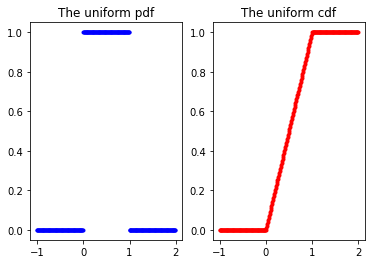

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2)
ax[0].plot(xs,pys,"b.",label = "pdf") # ax : 도면
ax[1].plot(xs,cys,"r.",label = "cdf")
ax[0].set_title("The uniform pdf")
ax[1].set_title("The uniform cdf")
plt.show()

# 정규분포

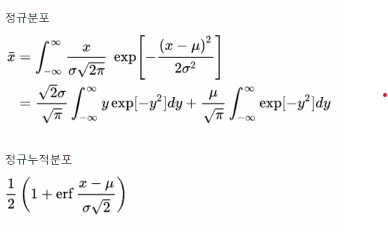

In [ ]:
import math
SQRT_TWO_PI = math.sqrt(2*math.pi)
def normal_pdf(x,mu = 0,sigma = 1): #정규분포(mu: 평균, sigma:표준편차)
  pre = 1/(sigma*SQRT_TWO_PI)
  post = math.exp(-((x-mu)**2)/(2*(sigma**2)))
  return pre * post

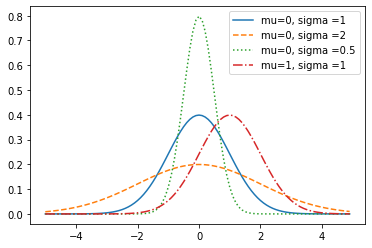

In [ ]:
xs = [x/10.0 for x in range(-50,50)]
ys1 = [normal_pdf(x,sigma=1)for x in xs ]
ys2 = [normal_pdf(x,sigma=2)for x in xs ]
ys3 = [normal_pdf(x,sigma=0.5)for x in xs ]
ys4 = [normal_pdf(x,mu=1)for x in xs ]
plt.plot(xs,ys1,'-',label="mu=0, sigma =1")
plt.plot(xs,ys2,'--',label="mu=0, sigma =2")
plt.plot(xs,ys3,':',label="mu=0, sigma =0.5")
plt.plot(xs,ys4,'-.',label="mu=1, sigma =1")
plt.legend()
plt.show()

# 정규누적분포
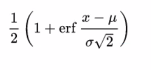

In [ ]:
def normal_cdf(x,mu = 0, sigma =1): #정규누적분포
  return(1+math.erf((x-mu)/(sigma*math.sqrt(2))))/2

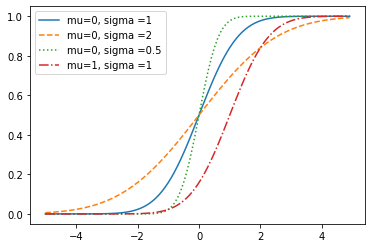

In [ ]:
xs = [x/10.0 for x in range(-50,50)]
ys1 = [normal_cdf(x,sigma=1)for x in xs ]
ys2 = [normal_cdf(x,sigma=2)for x in xs ]
ys3 = [normal_cdf(x,sigma=0.5)for x in xs ]
ys4 = [normal_cdf(x,mu=1)for x in xs ]
plt.plot(xs,ys1,'-',label="mu=0, sigma =1")
plt.plot(xs,ys2,'--',label="mu=0, sigma =2")
plt.plot(xs,ys3,':',label="mu=0, sigma =0.5")
plt.plot(xs,ys4,'-.',label="mu=1, sigma =1")
plt.legend()
plt.show()

# 베르누이시행(참과 거짓으로 결과가 출력)

In [ ]:
def bernouli_trial(p):
  return 1 if random.random()<p else 0

In [ ]:
cnt = 0
for _ in range(1000):
  re = bernouli_trial(1/6)
  print(re,end= ' .')#확률이 1/6인 사건이 발생하면 1, 발생하지 않으면 0 출력
  if re == 1:
    cnt +=1
print()
print(cnt)

0 .0 .1 .0 .0 .0 .1 .0 .1 .0 .0 .1 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .1 .0 .0 .0 .0 .1 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .1 .0 .0 .0 .0 .0 .1 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .1 .0 .0 .0 .0 .0 .1 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .1 .0 .0 .0 .1 .0 .0 .0 .0 .1 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .0 .0 .1 .0 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .1 .1 .0 .1 .0 .0 .1 .0 .0 .0 .1 .1 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .0 .0 .0 .0 .1 .1 .0 .0 .0 .0 .0 .1 .0 .0 .0 .0 .0 .1 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .0 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .0 .0 .0 .1 .0 .0 .0 .0 .0 .0 .0 .0 .1 .0 .1 .1 .0 .1 .1 .0 .0 .0 .0 .0 .0

In [ ]:
def binomial(n,p): #확률도 사용자가 만들어줌
  return sum(bernouli_trial(p) for _ in range(n))

In [ ]:
for _ in range(20):
  print(binomial(100,1/6),end = '.') #주사위를 100번 던졌을 때 숫자 1이 나올 횟수

15.20.15.21.13.20.19.20.20.20.18.19.7.14.19.14.15.19.20.14.

In [ ]:
from collections import Counter

In [ ]:
def binomial_histogram(p,n,nps): #p: 확률, n: 시도할 횟수, nps:(p,n)을 시도할 횟수
  data = [binomial(n,p) for _ in range(nps)]
  #print(data) 데이터가 가진 의미 나중에 확인하려면 주석 풀어서 확인하기!
  #print(len(data))
  histogram = Counter(data)
  #print(histogram.values())
  #print(histogram.keys())'
  #print([v/nps for v in histogram.values()])
  mu = p*n
  sigma = math.sqrt(n*p*(1-p))
  xs = range(min(data),max(data)+1)
  ys = [normal_cdf(i+0.5, mu,sigma)-normal_cdf(i-0.5,mu,sigma) for i in xs]
  #ys2 = [normal_cdf(i,mu,sigma) for i in xs]
  
  plt.bar(histogram.keys(), [v/nps for v in histogram.values()],color = 'r')
  plt.plot(xs,ys)
  plt.title("Binomal Distribution and Normal Approximation") #이항 분포와 정규근사
  plt.show() 

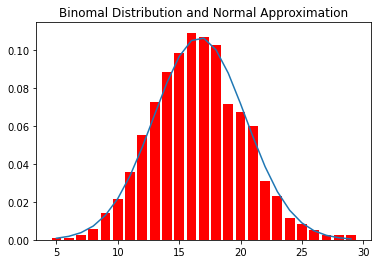

In [ ]:
binomial_histogram(1/6,100,1200)
#파란색 선: 정규분포, 빨간색 막대: 그래프 베르누이 실행

주사위를 100번 던졌을 때 1이 나오는 횟수가 5~10일 확률은 얼마인가?

0.9997569179625103 0.9999993170152472
0.0002423990527369302


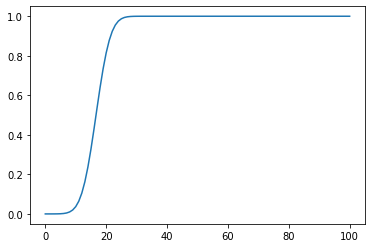

In [ ]:
p=1/6
n=100
mu =p*n # 평균(기대값)
sigma = math.sqrt(n*p*(1-p))
c5 = normal_cdf(13,mu-mu,sigma=sigma)
c10 = normal_cdf(18,mu-mu,sigma=sigma)
print(c5,c10)
print(c10-c5)
xs = [ x for x in range(101)]
ys = [normal_cdf(x,mu=mu,sigma=sigma)for x in xs]
plt.plot(xs,ys)

# 로지스틱회귀
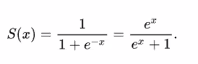

In [1]:
import numpy as np
def sigmoid(x): #시그모이드 함수, 로지스틱 함수와 같은 함수이다.
  return 1/(1+np.e**(-x))

In [2]:
xs = range(-10,10) 
ys = [sigmoid(x) for x in xs]
plt.plot(xs,ys, marker = '.')
plt.axvline(x=0, color ='black')
plt.axhline(y=0, color ='red')
plt.axhline(y=1, color ='green')
plt.show()

NameError: ignored

In [ ]:
def gradient(y,x,w,b):
  wd = x*(sigmoid(w*x*b)-y)
  bd = (sigmoid(w*x+b)-y)
  return wd, bd

In [ ]:
#가중치와 편향 구하기
def gradient_descent(xs, ys, lr=0.0001, epochs=100):
  if isinstance(xs, list):
    xs = np.array(xs).reshape(-1)
  wbhl = [] #학습 과정에서의 가중치의 편향을 보관하기 위함

  wp = np.random.uniform(-1,1) #초기 가중치를 랜덤하게 결정
  bp = np.random.uniform(-1,1) #초기 편향

  for epoch in range(epochs):
    for i,x in enumerate(xs):
      wd,bd = gradient(ys[i],x,wp,bp) #경사를 구함
      wp = wp - (wd*lr) #가중치를 경사*lr 만큼 빼줌(곡선의 아래 부분으로 이동)
      bp = bp - (bp*lr) #편향을 경사*lr만큼 빼줌(곡선의 아래 부분으로 이동)
    wbhl.append([wp, bp])
    return wp, bp, wbhl

In [ ]:
xs = np.arange(-10,10,0.3)
ys = np.array([1 if x>0 else 0 for x in xs])
plt.plot(xs,ys,'.')
plt.show()

In [ ]:
xs = np.arange(-10,10,0.3)
ys = np.array([1 if x>0 else 0 for x in xs])

wp, bp, wbhl = gradient_descent(xs,ys,epochs=1000)

min_val = min(min(xs),min(ys))
max_val = max(max(xs),max(ys))

for wi in range(0, len(wbhl), 50):
  w, b = wbhl[wi]
  #pre_ys = [sigmoid(wb[0]*x+wb[1]) for x in xs]
  pre_ys = [sigmoid(w*x+b) for x in xs]
  
  plt.figure(figsize=(5,5))
  plt.plot(xs,ys,'b^',label='actual') #실제값을 도면에 뿌림
  plt.plot(xs,pre_ys,'r.',label=f"epoch:{wi} predict w:{w} b:{b}")
  plt.axvline(x=0, color='black')
  plt.axhline(y=0, color='black')
  plt.xlim(min_val, max_val)
  plt.ylim(min_val, max_val)
  plt.legend()
  plt.show()

In [ ]:
xs2 = [[x] for x in xs]
from sklearn.model_selection import train_test_split

In [ ]:
train_xs,test_xs,train_ys,test_ys = train_test_split(xs2,ys)

In [ ]:
len(xs2), len(ys), len(train_xs), len(test_xs),len(train_ys),len(test_ys)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()#모델개체
lr_model.fit(train_xs,train_ys)# 공부하자
pre_vals = lr_model.predict(test_xs) #예측해라
for i,y in enumerate(test_ys):
  print(f"actual:{y} predict:{pre_vals[i]}")

In [ ]:
print(lr_model.score(train_xs,train_ys))
print(lr_model.score(test_xs,test_ys))

5>x 일때 99.7% 확률로 1

2<x<=5 일 때 90% 확률로 1

0<x<=2일 때 70%확률로 1

x<=0 일 때 0% 확률로 1

In [ ]:
xs = np.arange(-10,10,0.3)
ys1=[]
for x in xs:
  if x>5:
    if np.random.uniform(0,10)>0.03: #0~ 10 사이의 랜덤한 수가 0.03보다 크면
      ys1.append(1)
    else:
     ys1.append(0)
  elif x>2:
    if np.random.uniform(0,10)>1:
      ys1.append(1)
    else:
      ys1.append(0)
  elif x>0:
    if np.random.uniform(0,10)>3:
      ys1.append(1)
    else:
      ys1.append(0)
  else:
    ys1.append(0)

In [ ]:
len(ys1)
len(xs)

In [ ]:
plt.plot(xs,ys1,'.')
plt.show()

In [ ]:
wp, bp, wbhl = gradient_descent(xs,ys,epochs=1000)

min_val = min(min(xs),min(ys))
max_val = max(max(xs),max(ys))

for wi in range(0, len(wbhl), 50):
  if wi>5 and wi%50!=0:
    continue
  w, b = wbhl[wi]
  pre_ys = [sigmoid(w*x+b) for x in xs]
  
  plt.figure(figsize=(5,5))
  plt.plot(xs,ys,'b^',label='actual') #실제값을 도면에 뿌림
  plt.plot(xs,pre_ys,'r.',label=f"epoch:{wi} predict w:{w} b:{b}")
  plt.axvline(x=0, color='black')
  plt.axhline(y=0, color='black')
  plt.xlim(min_val, max_val)
  plt.ylim(min_val, max_val)
  plt.legend()
  plt.show()